In [1]:
"""
pip install pandas 
pip install scipy
pip install matplotlib
pip install ipython
"""

'\npip install pandas \npip install scipy\npip install matplotlib\npip install ipython\n'

In [2]:
from scipy.signal import periodogram
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import numpy as np

In [3]:
# reading dataset file into a dataframe called 'data'
data = pd.read_csv('./Sub_Division_IMD_2017.csv')
display(data)    #  Displaying the DataFrame that we just read

,CITY,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,Assam,2013,1.1,9.6,44.0,112.8,346.7,286.2,367.8,289.7,229.3,126.3,1.0,2.0,1816.4,10.7,503.5,1172.9,129.3
4535,Assam,2014,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,2206.1,30.3,431.9,1705.5,38.5
4536,Assam,2015,13.4,15.5,37.5,250.9,332.5,558.5,300.1,590.9,279.9,62.6,14.0,15.2,2470.9,28.9,620.9,1729.3,91.8
4537,Assam,2016,18.9,15.9,64.1,327.8,334.0,369.0,498.4,185.3,271.2,136.5,38.2,7.4,2266.9,34.8,726.0,1323.9,182.1


In [4]:
# Data Exploration:
# After inspecting the data, I see that the data is of 117 years of only some selected states in India, with their rainfall data for each month.
# The data ranges from 1901-2017. With a data of 100+ years, we can analyze various aspects.

# Analytical Goals:
# 1. Long-term trend
# 2. Seasonal Pattern
# 3. Months with max-min rainfall and variability
# 4. Extreme events in our centurial data
# 5. State-wise analysis
# 6. Trend-line (direction and pattern of my data)
# 7. Comparing two different months of the same and different years
# 8. Time-series of the state with max-min rainfall and understanding the pattern for the same
# 9. Spatial Analysis
# 10. Forecast the future rainfall patterns
# 11. Grouping the data into groups of 15-20 years and analyzing the variability

C:\Users\priya\AppData\Local\Temp\ipykernel_27008\2143737848.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / freq, power)


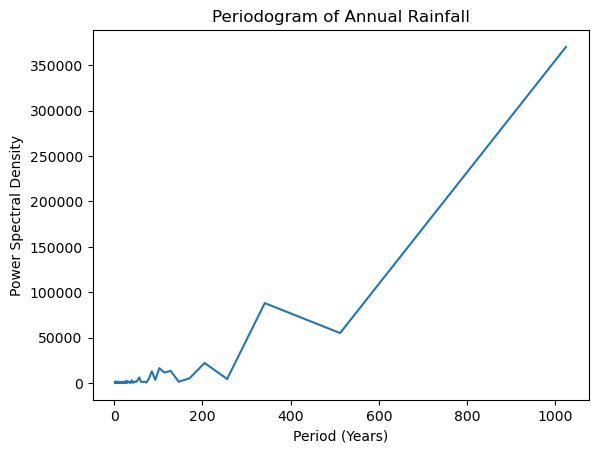

In [5]:
import pandas as pd

df = data.dropna()

# Compute the periodogram
freq, power = periodogram(df['ANNUAL'], fs=1, scaling='spectrum', nfft=1024)

# Plot the periodogram
plt.plot(1 / freq, power)
plt.xlabel('Period (Years)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of Annual Rainfall')
plt.show()

C:\Users\priya\AppData\Local\Temp\ipykernel_27008\750027613.py:12: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1 / non_zero_freq, power)


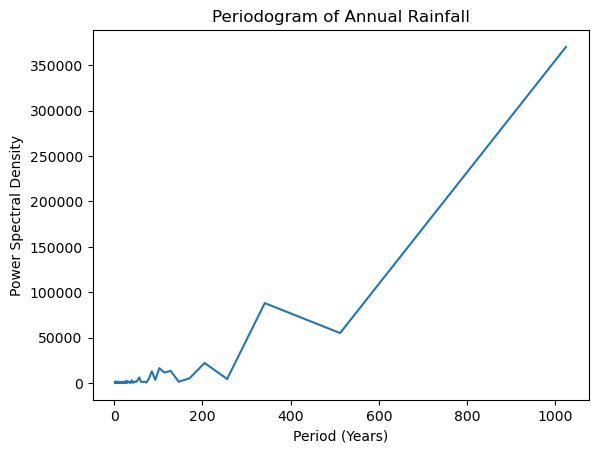

In [6]:
df = data.dropna()

# Compute the periodogram
freq, power = periodogram(df['ANNUAL'], fs=1, scaling='spectrum', nfft=1024)

# Check and handling division by zero
# to resolve the warning
non_zero_freq = freq.copy()
non_zero_freq[non_zero_freq == 1] = 1e-10  

# Plot the periodogram
plt.plot(1 / non_zero_freq, power)
plt.xlabel('Period (Years)')
plt.ylabel('Power Spectral Density')
plt.title('Periodogram of Annual Rainfall')
plt.show()

# I'm able to plot the graph but unable to resolve the warning, 

In [7]:
# omitting last 4 columns (JF,MAM,JJA, OND)- seasonal analysis
data1 = data.iloc[:, :-4]

In [8]:
Uttarakhand = (data1 == 'Uttarakhand').any(axis=1)
Uttarakhand = data1[Uttarakhand]

# Statistical results
mean_value = np.mean(Uttarakhand['ANNUAL'])
print(mean_value)
median_value = np.median(Uttarakhand['ANNUAL'])
print(median_value)

std_dev = np.std(Uttarakhand['ANNUAL'])
print(std_dev)
variance = np.var(Uttarakhand['ANNUAL'])
print(variance)

skewness = Uttarakhand['ANNUAL'].skew()
print(skewness)
kurtosis = Uttarakhand['ANNUAL'].kurt()
print(kurtosis)

minimum = np.min(Uttarakhand['ANNUAL'])
print(minimum)
maximum = np.max(Uttarakhand['ANNUAL'])
print(maximum)

q1 = np.percentile(Uttarakhand['ANNUAL'] , 25)
print(q1)
q3 = np.percentile(Uttarakhand['ANNUAL'] , 75)
print(q3)

iqr = q3 - q1
print(iqr)

1464.4418803418805
1477.8
261.02210314742905
68132.53833150708
0.09470247002144283
-0.2720189984247128
803.4
2102.9
1271.2
1616.1
344.89999999999986


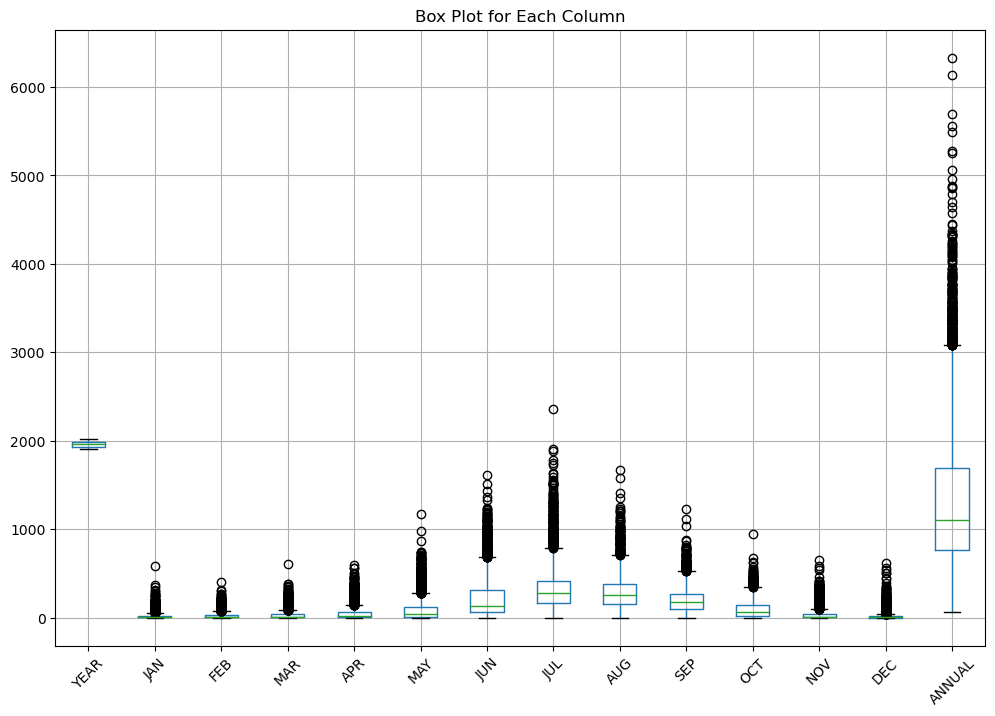

In [9]:
# Create a box plot for all columns
data1.boxplot(rot=45, figsize=(12, 8))
plt.title('Box Plot for Each Column')
plt.show()


# Box-plot( box-and-whisker plot) helps us to visualize the distribution of data
# helps visualize the spread, skewness, and central tendency of the data
# We can see outliers in our box-plot.

In [10]:

# Outlier rejection

# Setting a threshold for Z-scores (e.g., 3)
threshold = 3

# Create an empty DataFrame to store outliers
outliers_df = pd.DataFrame()

# Loop through each numeric column
for column_name in data1.select_dtypes(include=np.number).columns:
    # Calculate Z-scores
    z_scores = np.abs((data1[column_name] - data1[column_name].mean()) / data1[column_name].std())

    # Identify outliers
    column_outliers = data1[z_scores > threshold]

    # Append outliers to the outliers_df
    outliers_df = pd.concat([outliers_df, column_outliers])

# Remove duplicates from outliers_df
outliers_df = outliers_df.drop_duplicates()

# Remove outliers from the original DataFrame
df_cleaned = data1.drop(outliers_df.index)

# Display information about removed outliers
print(f'Number of outliers removed: {len(outliers_df)}')
print('Outliers:')
print(outliers_df)

Number of outliers removed: 735
Outliers:
                           CITY  YEAR    JAN   FEB    MAR    APR    MAY  \
10    Andaman & Nicobar Islands  1912  583.7   0.8    0.0   21.9  140.7   
18    Andaman & Nicobar Islands  1920  122.3   7.4    3.1   13.0  237.4   
20    Andaman & Nicobar Islands  1922  245.3  34.3   15.6  323.1  289.7   
24    Andaman & Nicobar Islands  1926  122.1   0.0    0.0    0.5  198.4   
56    Andaman & Nicobar Islands  1962  152.4  14.9   17.3   46.4  310.4   
...                         ...   ...    ...   ...    ...    ...    ...   
4018                Lakshadweep  1965    0.2   7.3    8.3   35.0  162.5   
4022                Lakshadweep  1969   30.0   4.1    0.0   63.3  237.9   
4051                Lakshadweep  1998   52.0   0.0    1.8   40.3   68.2   
4068                Lakshadweep  2015    2.2   0.5    3.7   87.1  133.1   
4070                Lakshadweep  2017   21.3   0.9  100.2    1.8  145.7   

        JUN    JUL    AUG    SEP    OCT    NOV    DEC  AN

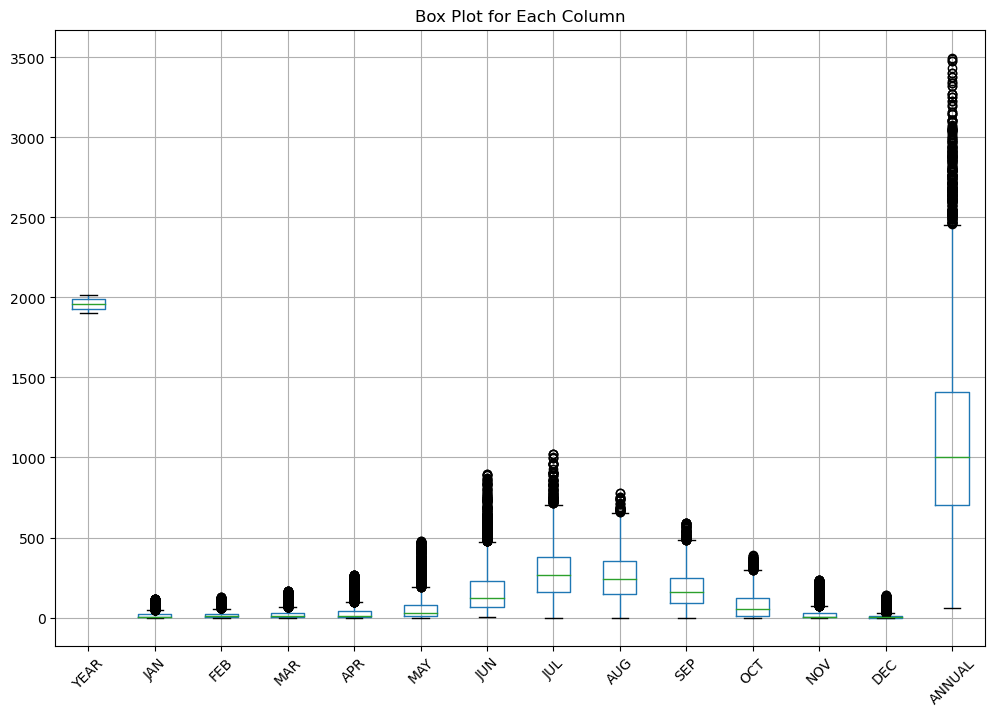

In [11]:
# Create a box plot for all columns
df_cleaned.boxplot(rot=45, figsize=(12, 8))
plt.title('Box Plot for Each Column')
plt.show()

# Box-plot here has no outliers, will be using the clean data for further analysis.

<Axes: xlabel='YEAR'>

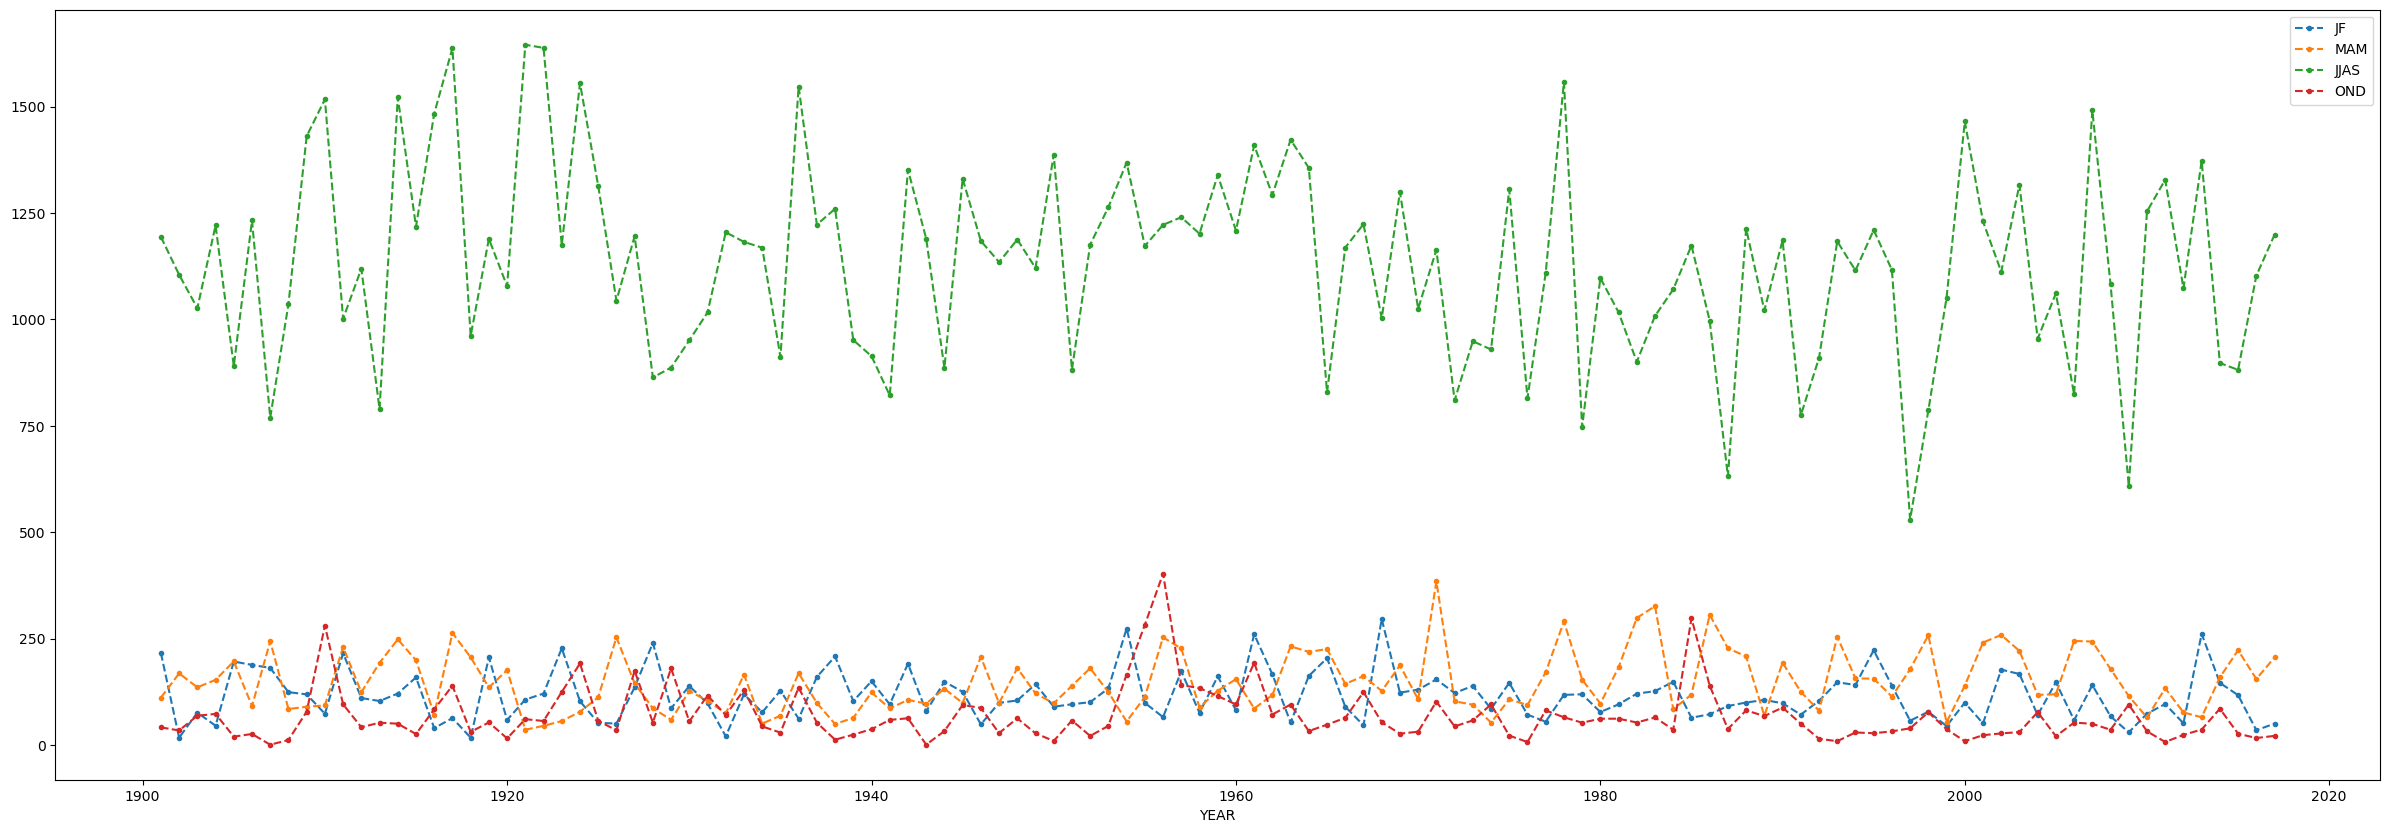

In [12]:
#  Seasonal Analysis

# Reading the set again , In this analysis I'm using the last 4 columns of my set
# I'm plotting months with time 
df = pd.read_csv("./Sub_Division_IMD_2017.csv")
df = df.dropna()

# as i have more than 20 states, choosing single state and analyzing which seasons have max-min rainfall and variability
# JF  - Jan and feb
# MAM - mar, april and may
# JJAS - june, june , august and september
# OND - october, november and december 
seasons = (df == 'Uttarakhand').any(axis=1)
seasons = df[seasons]

# Omitting the rest of the columns
seasons =  seasons.iloc[:, :2].join(seasons.iloc[:, -4:])
seasons.plot( x = 'YEAR' , figsize=(30,10), linestyle = '--' , marker = '.')

# the graph shows JUNE, JULY, AUGUST AND SEPT are the months with max rainfall
# we can conclude JJAS - rainy season in india(uttarakhand)
# we can check for all the states similary.

             CITY  YEAR    JAN   FEB    MAR   APR    MAY    JUN    JUL    AUG  \
1265  Uttarakhand  1902    0.0  17.0   52.2  63.7   52.1  113.1  444.1  327.5   
1266  Uttarakhand  1903   68.0   7.9   87.6  10.3   37.5   83.0  251.6  442.7   
1267  Uttarakhand  1904   40.0   5.2   78.3  13.6   61.1  180.1  449.6  417.2   
1268  Uttarakhand  1905  115.4  80.7   99.8  26.1   70.3  111.5  299.9  349.5   
1271  Uttarakhand  1908   49.4  74.6    6.3  31.8   46.3  144.9  411.4  423.5   
...           ...   ...    ...   ...    ...   ...    ...    ...    ...    ...   
1375  Uttarakhand  2012   38.8  11.9   28.1  39.2    9.1   46.0  387.1  419.5   
1377  Uttarakhand  2014   45.9  99.9   68.4  37.6   52.9   62.9  462.7  264.2   
1378  Uttarakhand  2015   54.5  62.6  127.3  57.3   38.0  186.6  337.0  305.3   
1379  Uttarakhand  2016    5.4  29.3   45.8   9.9   99.3  174.4  508.4  308.5   
1380  Uttarakhand  2017   36.6  13.5   44.5  52.8  108.2  175.6  460.9  349.0   

        SEP   OCT   NOV   D

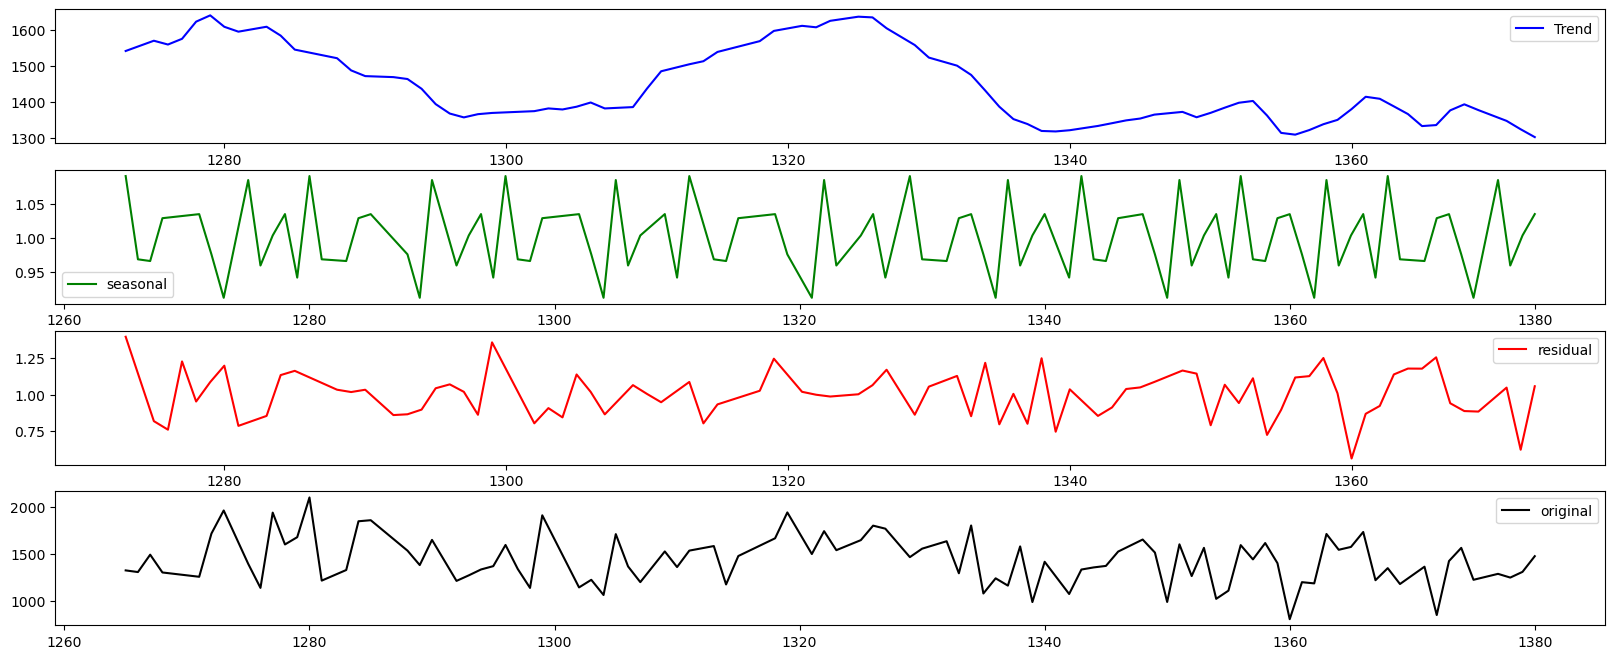

In [13]:
# Seasonal patterns
"""
To find seasonal patterns in a rainfall dataset spanning 100 years, I am using time series analysis
seasonal decomposition, which separates the data into its underlying components:
trend, seasonal, and residual.
Trend will help us look for long-term patterns or trends in the data, if it is increasing, decreasing, or relatively stable over time?
Seasonal helps us Identify repeating patterns that occur at regular intervals, seasonality can be noted with the peaks and trough
Residual Checks for any remaining patterns or irregularities in the data.
"""


from statsmodels.tsa.seasonal import seasonal_decompose

# selecting uttarakhand for seasonal decompose, we can perform for all the states but it'll be easy and feasible to understand the patter of the data
Uttarakhand_cleaned = (df_cleaned == 'Uttarakhand').any(axis=1)
Uttarakhand_cleaned = df_cleaned[Uttarakhand_cleaned]
print(Uttarakhand_cleaned)

decomposition = seasonal_decompose(Uttarakhand_cleaned['ANNUAL'], model = 'multiplicative', period = 12)
plt.figure(figsize = (20,8))
plt.subplot(4,1,1)
plt.plot(Uttarakhand_cleaned.index, decomposition.trend, label='Trend', color = 'blue')
plt.legend()
plt.subplot(4,1,2)
plt.plot(Uttarakhand_cleaned.index, decomposition.seasonal, label='seasonal', color = 'green')
plt.legend()
plt.subplot(4,1,3)
plt.plot(Uttarakhand_cleaned.index, decomposition.resid, label='residual', color = 'red')
plt.legend()
plt.subplot(4,1,4)
plt.plot(Uttarakhand_cleaned.index, Uttarakhand_cleaned['ANNUAL'], label='original', color = 'black')
plt.legend()
plt.show()

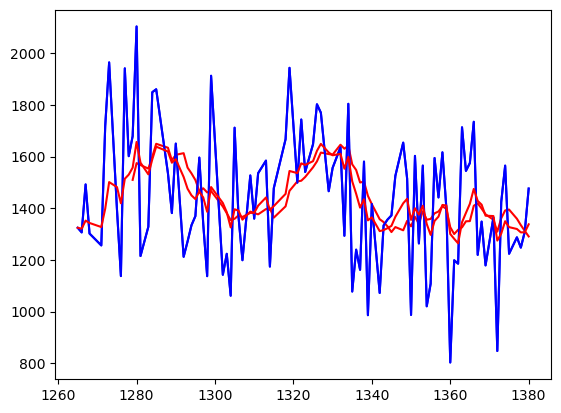

In [30]:
"""
running average or moving average
Smoothing the data using running average or moving averageto to reduce short-term variability and highlight long term trends.
SMA AND EMA
"""

# simple Moving averages

Uttarakhand_cleaned['Simple Moving Average'] = Uttarakhand_cleaned['ANNUAL'].rolling(window = 12).mean()

plt.plot(Uttarakhand_cleaned.index , Uttarakhand_cleaned['ANNUAL'], label = 'Original', color = 'blue')
plt.plot(Uttarakhand_cleaned.index , Uttarakhand_cleaned['Simple Moving Average'], label = '12 month Moving average', color = 'red')

# exponential Moving averages

window_size = 10
Uttarakhand_cleaned['Exponentially Moving Average'] = Uttarakhand_cleaned['ANNUAL'].ewm(span = window_size , adjust = False ).mean()

plt.plot(Uttarakhand_cleaned.index , Uttarakhand_cleaned['ANNUAL'], label = 'Original', color = 'blue')
plt.plot(Uttarakhand_cleaned.index , Uttarakhand_cleaned['Exponentially Moving Average'], label = '12 month Moving average', color = 'red')

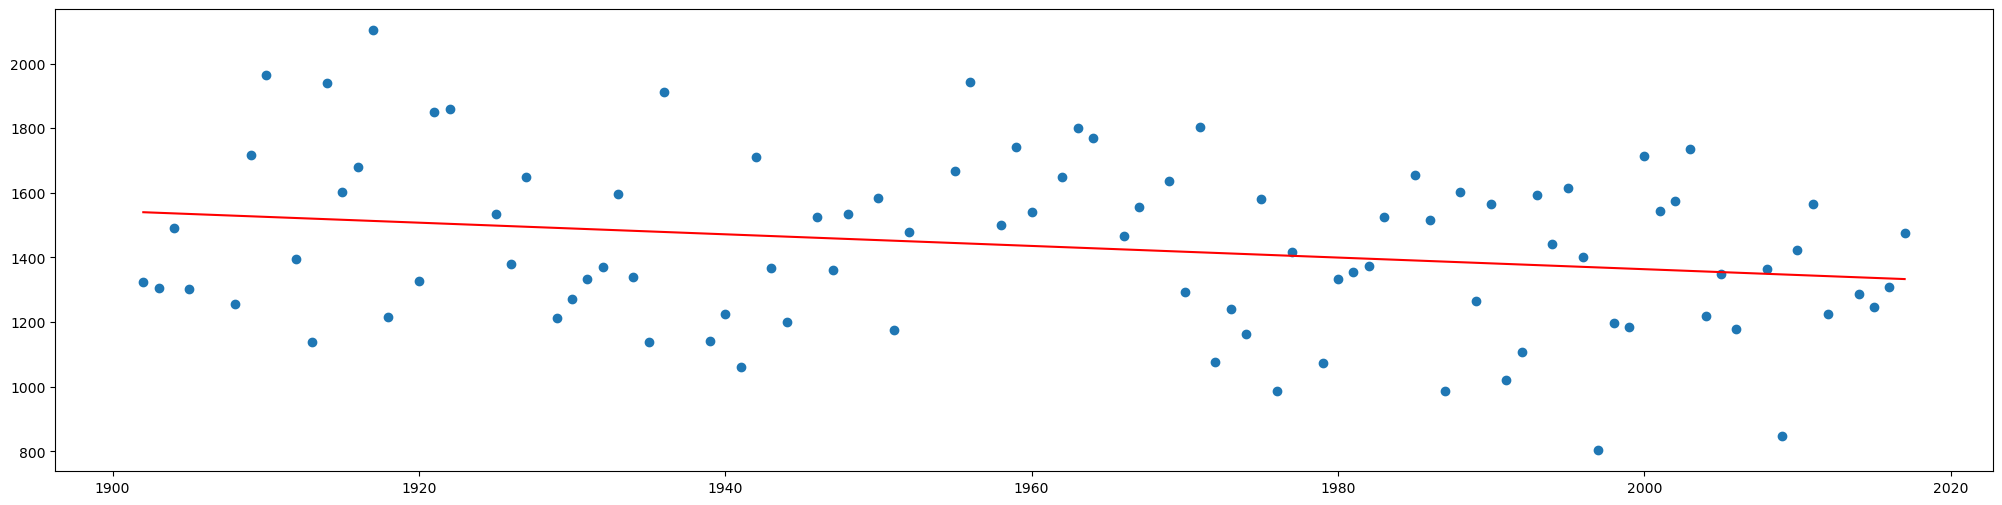

In [15]:
# Trend line
# Trend line signifies the general direction of the pattern of our data.

x = Uttarakhand_cleaned['YEAR']
y = Uttarakhand_cleaned['ANNUAL']

coefficients = np.polyfit(x,y,1)
polyfit_line = np.poly1d(coefficients)

fit_y = polyfit_line(x)

plt.figure(figsize = (25,6))
plt.scatter(x,y,label = 'Data Points')
plt.plot(x, fit_y, color = 'red')
plt.show()

In [16]:
df_merging = df_cleaned.iloc[:, :15]
df_merging 

# saving the cleaned data for further analysis.

,CITY,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
11,Andaman & Nicobar Islands,1913,84.8,0.5,1.3,2.5,190.7,530.0,280.8,205.8,580.1,288.8,133.0,67.5,2365.8
19,Andaman & Nicobar Islands,1921,13.2,3.1,0.0,37.5,351.2,282.7,487.1,330.0,581.2,360.7,118.2,41.5,2606.4
21,Andaman & Nicobar Islands,1923,79.5,0.0,NaN,91.3,293.5,808.4,636.9,182.2,560.5,131.9,197.4,70.6,NaN
30,Andaman & Nicobar Islands,1932,2.8,2.5,10.1,58.2,479.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Andaman & Nicobar Islands,1939,54.1,1.5,16.1,77.3,480.5,541.0,335.6,202.8,512.5,263.9,165.9,131.3,2782.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,Assam,2009,7.9,11.6,44.9,134.9,246.5,321.1,426.3,533.8,192.3,135.9,9.0,4.0,2068.2
4532,Assam,2011,11.1,11.4,109.0,92.1,238.3,316.0,395.8,302.6,221.6,30.2,11.9,3.5,1743.4
4534,Assam,2013,1.1,9.6,44.0,112.8,346.7,286.2,367.8,289.7,229.3,126.3,1.0,2.0,1816.4
4535,Assam,2014,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,2206.1


In [17]:
df_cleaned = df_cleaned.iloc[:, :14]

# Setting States and Year as indices and then converting the dataframe into long format using stack() method
df_cleaned = df_cleaned.set_index(['YEAR', 'CITY']).stack().reset_index()

# Defining mapper dictionary to change the column names of last 2 columns
mapper = {df_cleaned.columns.values[2]:'MONTHS',
          df_cleaned.columns.values[3]:'RAINFALL IN MM'}

# Renaming the columns
df_cleaned.rename(columns=mapper, inplace=True)

# Displaying the dataframe 
display(df_cleaned)

,YEAR,CITY,MONTHS,RAINFALL IN MM
0,1913,Andaman & Nicobar Islands,JAN,84.8
1,1913,Andaman & Nicobar Islands,FEB,0.5
2,1913,Andaman & Nicobar Islands,MAR,1.3
3,1913,Andaman & Nicobar Islands,APR,2.5
4,1913,Andaman & Nicobar Islands,MAY,190.7
...,...,...,...,...
45593,2015,Assam,AUG,590.9
45594,2015,Assam,SEP,279.9
45595,2015,Assam,OCT,62.6
45596,2015,Assam,NOV,14.0


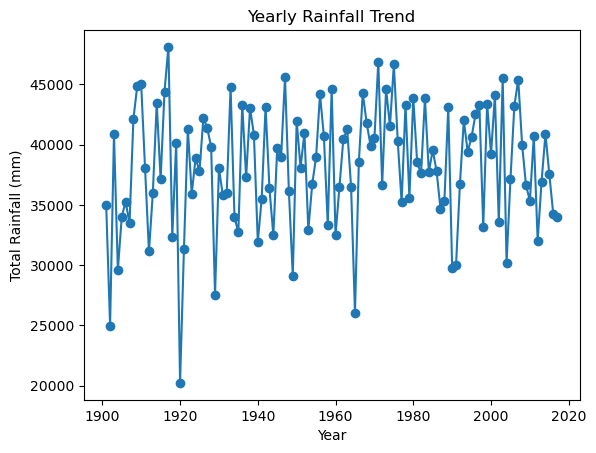

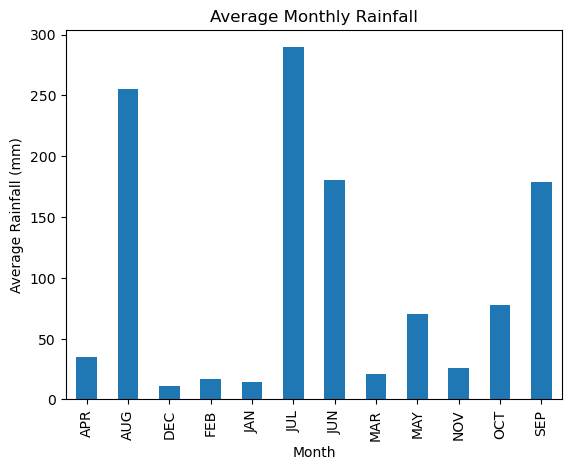

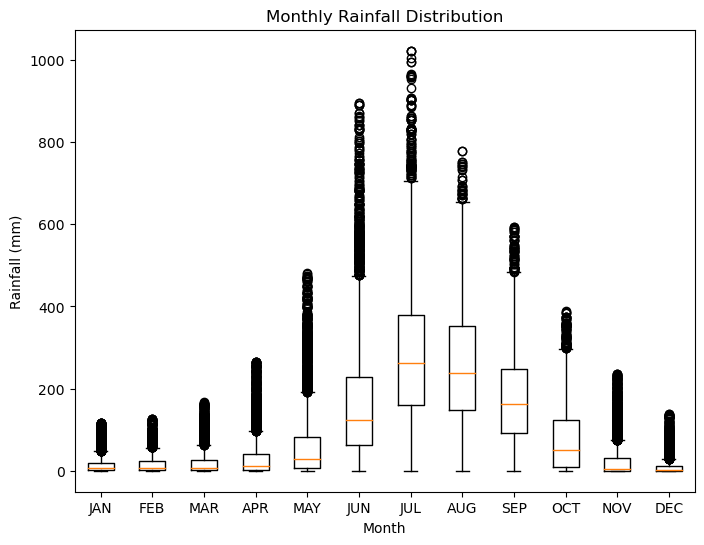

In [18]:

# 1. Temporal Analysis - Time Series of Yearly Rainfall
yearly_rainfall = df_cleaned.groupby('YEAR')['RAINFALL IN MM'].sum()
yearly_rainfall.plot(kind='line', marker='o', title='Yearly Rainfall Trend')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.show()

# 2. Seasonal Patterns - Average Rainfall for Each Month
monthly_average = df_cleaned.groupby('MONTHS')['RAINFALL IN MM'].mean()
monthly_average.plot(kind='bar', title='Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.show()

# 3. Monthly Distribution - Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot([df_cleaned[df_cleaned['MONTHS'] == month]['RAINFALL IN MM'] for month in df_cleaned['MONTHS'].unique()],
            labels=df_cleaned['MONTHS'].unique())
plt.title('Monthly Rainfall Distribution')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.show()

In [19]:
# since the data is of 117 years, lets do some grouped-analysis
# I'll making groups of 15 years, and comparing the groups

# re-reading the data
df = pd.read_csv("./Sub_Division_IMD_2017.csv")


def create_year_groups(dataframe, group_size):
    groups = []
    for start_year in range(dataframe['YEAR'].min(), dataframe['YEAR'].max() + 1, group_size):
        end_year = start_year + group_size - 1
        group = dataframe[(dataframe['YEAR'] >= start_year) & (dataframe['YEAR'] <= end_year)]
        groups.append(group)
    return groups


groups_of_15_years = create_year_groups(df, 15)


for i, group in enumerate(groups_of_15_years):
    max_rainfall_year = group.loc[group['ANNUAL'].idxmax()]['YEAR']
    print(f"Group {i + 1}: Maximum Rainfall Year - {max_rainfall_year}")

# Maximum rainfall states 
max_rainfall_states_overall = df.loc[df.groupby('CITY')['ANNUAL'].idxmax()][['CITY', 'YEAR', 'ANNUAL']]
print("\nMaximum Rainfall States Overall:")
print(max_rainfall_states_overall)

# Minimum rainfall 
min_rainfall_group = min(groups_of_15_years, key=lambda x: x['ANNUAL'].sum())
print("\nMinimum Rainfall Among the Groups:")
print(min_rainfall_group[['YEAR', 'ANNUAL']])

Group 1: Maximum Rainfall Year - 1914
Group 2: Maximum Rainfall Year - 1921
Group 3: Maximum Rainfall Year - 1938
Group 4: Maximum Rainfall Year - 1948
Group 5: Maximum Rainfall Year - 1961
Group 6: Maximum Rainfall Year - 1988
Group 7: Maximum Rainfall Year - 1994
Group 8: Maximum Rainfall Year - 2013

Maximum Rainfall States Overall:
                           CITY  YEAR  ANNUAL
632                 West Bengal  1971  2099.8
55    Andaman & Nicobar Islands  1961  3938.2
3128             Andhra Pradesh  2010  1712.4
144           Arunachal Pradesh  1948  6331.1
4495                      Assam  1974  3403.5
999                       Bihar  1987  1660.4
4087                 Chandigarh  1917   986.7
2962               Chhattisgarh  1961  1974.0
1397                      Delhi  1917   986.7
2392                    Gujarat  1976  1620.1
4204                    Haryana  1917   986.7
1669           Himachal Pradesh  1955  1919.2
1825            Jammu & Kashmir  1994  1732.5
866               

In [20]:
# Spatial Analysis

main_data = df_merging
# Loading the dataset containing latitude and longitude
# 2nd dataset, will be merging both the datasets for spatial analysis
lat_lon_data = pd.read_csv('./poptable.csv')

# Check the columns in each DataFrame
print("Columns in main_data:", main_data.columns)
print("Columns in lat_lon_data:", lat_lon_data.columns)

lat_lon_data['CITY'] = lat_lon_data['CITY'].str.strip()
main_data['CITY'] = main_data['CITY'].str.strip()

lat_lon_data.dropna(subset=['CITY'], inplace=True)
main_data.dropna(subset=['CITY'], inplace=True)

lat_lon_data['CITY'] = lat_lon_data['CITY'].astype(str)
main_data['CITY'] = main_data['CITY'].astype(str)

lat_lon_data['CITY'] = lat_lon_data['CITY'].str.replace('[^\w\s]', '')
main_data['CITY'] = main_data['CITY'].str.replace('[^\w\s]', '')

Columns in main_data: Index(['CITY', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG',
       'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL'],
      dtype='object')
Columns in lat_lon_data: Index(['CITY', 'LATITUDE', 'LONGITUDE'], dtype='object')


In [21]:
# Convert all string columns to uppercase
df_merging['CITY'] = df_merging['CITY'].str.upper()  # Example for a specific column

# Display the updated DataFrame
print(df_merging)

                           CITY  YEAR   JAN   FEB    MAR    APR    MAY    JUN  \
11    ANDAMAN & NICOBAR ISLANDS  1913  84.8   0.5    1.3    2.5  190.7  530.0   
19    ANDAMAN & NICOBAR ISLANDS  1921  13.2   3.1    0.0   37.5  351.2  282.7   
21    ANDAMAN & NICOBAR ISLANDS  1923  79.5   0.0    NaN   91.3  293.5  808.4   
30    ANDAMAN & NICOBAR ISLANDS  1932   2.8   2.5   10.1   58.2  479.7    NaN   
37    ANDAMAN & NICOBAR ISLANDS  1939  54.1   1.5   16.1   77.3  480.5  541.0   
...                         ...   ...   ...   ...    ...    ...    ...    ...   
4530                      ASSAM  2009   7.9  11.6   44.9  134.9  246.5  321.1   
4532                      ASSAM  2011  11.1  11.4  109.0   92.1  238.3  316.0   
4534                      ASSAM  2013   1.1   9.6   44.0  112.8  346.7  286.2   
4535                      ASSAM  2014   2.0  28.3   29.3   51.5  351.1  426.4   
4536                      ASSAM  2015  13.4  15.5   37.5  250.9  332.5  558.5   

        JUL    AUG    SEP  

In [22]:
# Merge the datasets based on the 'CITY' column
merged_data = pd.merge(df_merging, lat_lon_data[['CITY', 'LATITUDE', 'LONGITUDE']], on='CITY', how='left')

# Display the merged dataset
merged_data

,CITY,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,LATITUDE,LONGITUDE
0,ANDAMAN & NICOBAR ISLANDS,1913,84.8,0.5,1.3,2.5,190.7,530.0,280.8,205.8,580.1,288.8,133.0,67.5,2365.8,NaN,NaN
1,ANDAMAN & NICOBAR ISLANDS,1921,13.2,3.1,0.0,37.5,351.2,282.7,487.1,330.0,581.2,360.7,118.2,41.5,2606.4,NaN,NaN
2,ANDAMAN & NICOBAR ISLANDS,1923,79.5,0.0,NaN,91.3,293.5,808.4,636.9,182.2,560.5,131.9,197.4,70.6,NaN,NaN,NaN
3,ANDAMAN & NICOBAR ISLANDS,1932,2.8,2.5,10.1,58.2,479.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANDAMAN & NICOBAR ISLANDS,1939,54.1,1.5,16.1,77.3,480.5,541.0,335.6,202.8,512.5,263.9,165.9,131.3,2782.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,ASSAM,2009,7.9,11.6,44.9,134.9,246.5,321.1,426.3,533.8,192.3,135.9,9.0,4.0,2068.2,26.749981,94.216667
3800,ASSAM,2011,11.1,11.4,109.0,92.1,238.3,316.0,395.8,302.6,221.6,30.2,11.9,3.5,1743.4,26.749981,94.216667
3801,ASSAM,2013,1.1,9.6,44.0,112.8,346.7,286.2,367.8,289.7,229.3,126.3,1.0,2.0,1816.4,26.749981,94.216667
3802,ASSAM,2014,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,2206.1,26.749981,94.216667


In [23]:
merged_data = merged_data.dropna()
# dropping the null values
merged_data
# displaying the merged dataset

,CITY,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,LATITUDE,LONGITUDE
20,ARUNACHAL PRADESH,1965,37.4,120.7,103.7,254.4,306.9,404.7,315.8,351.3,172.9,51.5,72.6,4.9,2196.8,27.100399,93.616601
21,ARUNACHAL PRADESH,1966,22.4,91.5,98.4,180.2,177.9,473.2,432.7,411.6,197.6,78.9,39.0,6.3,2209.6,27.100399,93.616601
22,ARUNACHAL PRADESH,1967,13.3,45.5,147.9,96.6,164.0,253.1,434.5,220.8,212.8,58.5,10.0,11.5,1668.5,27.100399,93.616601
23,ARUNACHAL PRADESH,1968,54.2,41.4,135.9,117.6,307.2,510.1,404.8,227.5,243.5,75.8,12.5,8.4,2139.0,27.100399,93.616601
24,ARUNACHAL PRADESH,1969,19.2,10.0,33.8,127.0,202.3,412.3,405.1,333.9,241.4,42.9,34.8,15.1,1877.7,27.100399,93.616601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3799,ASSAM,2009,7.9,11.6,44.9,134.9,246.5,321.1,426.3,533.8,192.3,135.9,9.0,4.0,2068.2,26.749981,94.216667
3800,ASSAM,2011,11.1,11.4,109.0,92.1,238.3,316.0,395.8,302.6,221.6,30.2,11.9,3.5,1743.4,26.749981,94.216667
3801,ASSAM,2013,1.1,9.6,44.0,112.8,346.7,286.2,367.8,289.7,229.3,126.3,1.0,2.0,1816.4,26.749981,94.216667
3802,ASSAM,2014,2.0,28.3,29.3,51.5,351.1,426.4,374.4,484.6,420.2,35.0,3.0,0.4,2206.1,26.749981,94.216667


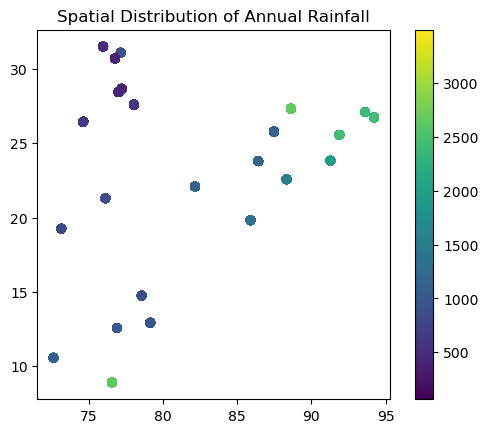

In [24]:
import geopandas as gpd

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry=gpd.points_from_xy(merged_data["LONGITUDE"], merged_data["LATITUDE"]))

# Create a choropleth map
gdf.plot(column="ANNUAL", cmap="viridis", legend=True)
plt.title("Spatial Distribution of Annual Rainfall")
plt.show()

In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim

# # THIS CELL IS NOT WORKING, 
# merged_data = merged_data.drop_duplicates().dropna()

# # Create a geolocator
# geolocator = Nominatim(user_agent="state_geocoding")

# merged_data['location'] = merged_data['CITY'].apply(geolocator.geocode)
# merged_data['LATITUDE'] = merged_data['location'].apply(lambda loc: loc.latitude if loc else None)
# merged_data['LONGITUDE'] = merged_data['location'].apply(lambda loc: loc.longitude if loc else None)


# merged_data_unique_city = merged_data_unique_city.drop(['location'], axis=1)

In [26]:
geolocator = Nominatim(user_agent="my_geocoding_map")

# Checking with a single location as the above cell is not working, 
# this section is only for testing the geoloactions
location = geolocator.geocode("ANDAMAN AND NICOBAR")
print(location.latitude, location.longitude)

12.61123865 92.83165406414926


In [28]:
import folium

# This section is only for testing
latitude = 12.61123865
longitude = 92.83165406414926

m = folium.Map(location=[latitude, longitude], zoom_start=10)
folium.Marker(location=[latitude, longitude], popup='Andaman & Nicobar Islands').add_to(m)

display(m)

In [29]:
locations = ['Andaman & Nicobar Islands', 'Delhi', 'Mumbai', 'Chennai']

m = folium.Map(location=[latitude, longitude], zoom_start=5)

for location_name in locations:
    location = geolocator.geocode(location_name)
    folium.Marker(location=[location.latitude, location.longitude], popup=location_name).add_to(m)

display(m)

In [32]:
# Create a map
m = folium.Map(location=[latitude, longitude], zoom_start=5)

# Initialize geolocator
geolocator = Nominatim(user_agent="state_geocoding")

# Loop through city names
for city_name in max_rainfall_states_overall['CITY']:
    try:
        # Geocode the city name to get latitude and longitude
        location = geolocator.geocode(city_name)
        

        if location is not None:
            # Add marker to the map
            folium.Marker(location=[location.latitude, location.longitude], popup=city_name).add_to(m)
    except Exception as e:
        print(f"Error geocoding {city_name}: {e}")

# Display the map
display(m)

# Below geo-map shows all the states with maximum rainfall